In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,precision_score
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [11]:
df = pd.read_csv('/Users/saptarshipal/DATA/spaceship-titanic/data/train.csv')
df.shape

(8693, 14)

In [12]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
df1 = df.drop(columns = ['PassengerId','Name','Cabin'])
df1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


# Imputing

In [14]:
df1.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [15]:
# Checking null values in rows

df.isnull().mean(axis=1).sort_values(ascending=False)

3882    0.214286
7211    0.214286
2639    0.214286
4164    0.214286
7682    0.214286
          ...   
3314    0.000000
3313    0.000000
3312    0.000000
3311    0.000000
8692    0.000000
Length: 8693, dtype: float64

In [375]:
imputer1 = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer2 = SimpleImputer(missing_values=np.nan,strategy='median')
imputer3 = SimpleImputer(missing_values=np.nan,strategy='mean')

df1['HomePlanet'] = imputer1.fit_transform(df1[['HomePlanet']])
df1['CryoSleep'] = imputer1.fit_transform(df1[['CryoSleep']])
df1['Destination'] = imputer1.fit_transform(df1[['Destination']])
df1['Age'] = imputer2.fit_transform(df1[['Age']])
df1['VIP'] = imputer1.fit_transform(df1[['VIP']])
df1['RoomService'] = imputer3.fit_transform(df1[['RoomService']])
df1['FoodCourt'] = imputer3.fit_transform(df1[['FoodCourt']])
df1['ShoppingMall'] = imputer3.fit_transform(df1[['ShoppingMall']])
df1['Spa'] = imputer3.fit_transform(df1[['Spa']])
df1['VRDeck'] = imputer3.fit_transform(df1[['VRDeck']])


# Encoding

In [376]:
df.nunique().sort_values(ascending=False)

PassengerId     8693
Name            8473
Cabin           6560
FoodCourt       1507
Spa             1327
VRDeck          1306
RoomService     1273
ShoppingMall    1115
Age               80
HomePlanet         3
Destination        3
CryoSleep          2
VIP                2
Transported        2
dtype: int64

In [377]:
encoder = LabelEncoder()

columns1 = ['HomePlanet','CryoSleep','Destination','VIP','Transported']
for column in columns1:
    df1[column] = encoder.fit_transform(df1[column])

df1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


# Data visualisation and Cleaning

In [378]:
df1.corr().transpose()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.083586,0.034737,0.133577,0.123512,0.211527,0.071642,0.101056,0.055014,0.039575,0.115461
CryoSleep,0.083586,1.000000,-0.096287,-0.071323,-0.078281,-0.243986,-0.205682,-0.206366,-0.198392,-0.193107,0.460132
Destination,0.034737,-0.096287,1.000000,-0.006771,-0.044707,0.046390,-0.111049,0.024384,-0.055916,-0.073233,-0.108152
Age,0.133577,-0.071323,-0.006771,1.000000,0.091863,0.067830,0.127983,0.032958,0.120878,0.099248,-0.074233
VIP,0.123512,-0.078281,-0.044707,0.091863,1.000000,0.056595,0.126006,0.018483,0.060573,0.123092,-0.037261
RoomService,0.211527,-0.243986,0.046390,0.067830,0.056595,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048
FoodCourt,0.071642,-0.205682,-0.111049,0.127983,0.126006,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074
ShoppingMall,0.101056,-0.206366,0.024384,0.032958,0.018483,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019
Spa,0.055014,-0.198392,-0.055916,0.120878,0.060573,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791
VRDeck,0.039575,-0.193107,-0.073233,0.099248,0.123092,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825


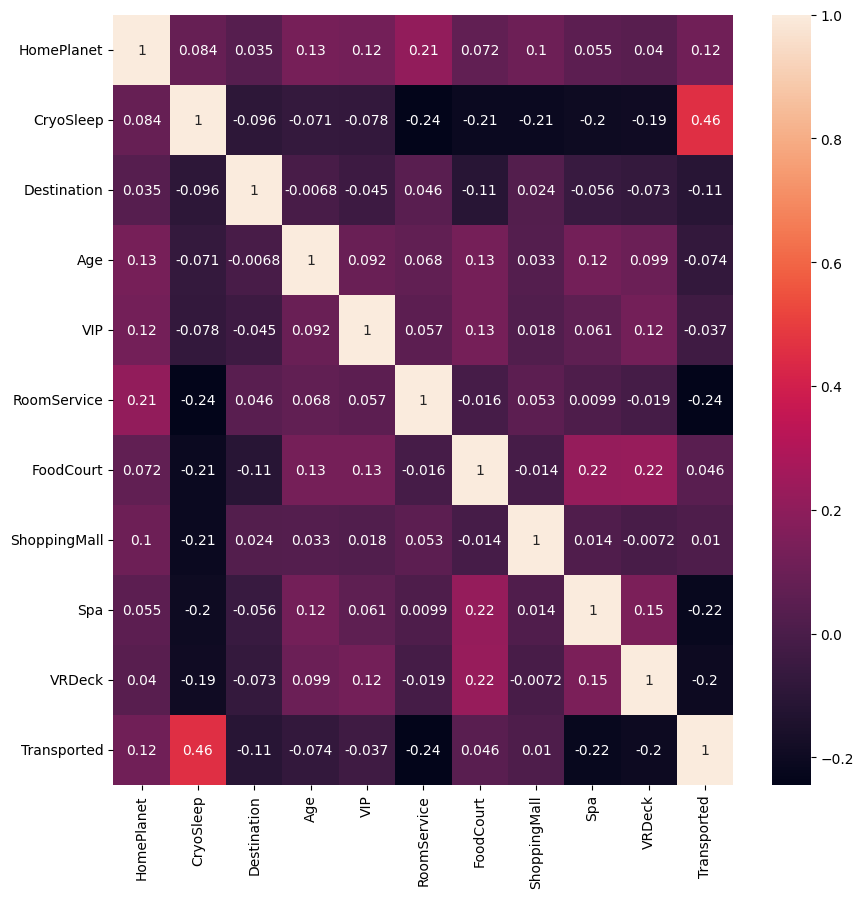

In [379]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr().transpose(),annot=True)
plt.show()


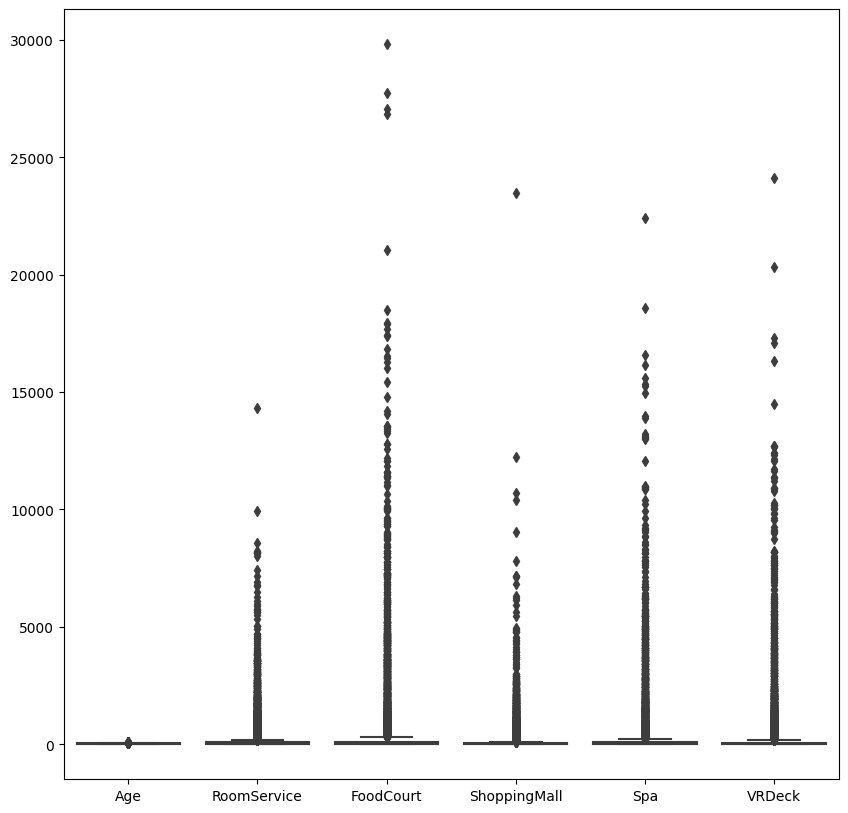

In [380]:
plt.figure(figsize=(10,10))

sns.boxplot(df1[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])
plt.show()
 

In [381]:
df1.shape

(8693, 11)

In [382]:
df1[df1['Spa']>15000]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
1095,1,0,0,19.0,0,0.0,1291.0,0.0,16139.0,687.0,0
1390,1,0,0,76.0,0,0.0,2732.0,422.0,16594.0,330.0,0
1598,1,0,2,43.0,0,0.0,760.0,17.0,15331.0,427.0,0
4278,1,0,0,54.0,0,0.0,559.0,0.0,15238.0,2799.0,0
5722,1,0,0,68.0,0,125.0,13437.0,0.0,22408.0,17.0,0
6921,1,0,2,33.0,0,0.0,2107.0,0.0,15586.0,473.0,0
7995,1,0,2,18.0,0,0.0,1878.0,0.0,18572.0,10028.0,0


In [383]:
df1.drop(df1[df1['FoodCourt']>20000].index,axis = 0,inplace = True)
df1.drop(df1[df1['Spa']>15000].index,axis = 0,inplace = True)
df1.drop(df1[df1['VRDeck']>15000].index,axis = 0,inplace = True)
df1.drop(df1[df1['ShoppingMall']>15000].index,axis = 0,inplace = True)
df1.drop(df1[df1['Age']==0].index,axis=0,inplace=True)
df1.drop(df1[df1['RoomService']>10000].index,axis = 0,inplace = True)
df1.drop(df1[df1['FoodCourt']>131].index,axis = 0,inplace = True)
df1.drop(df1[df1['ShoppingMall']>10000].index,axis = 0,inplace = True)
df1.drop(df1[df1['Spa']>9000].index,axis = 0,inplace = True)
df1.drop(df1[df1['VRDeck']>10000].index,axis = 0,inplace = True)
df1.shape

(6367, 11)

In [384]:
#df1.corr()[['Transported']].sort_values(by = 'Transported',ascending=False)
#df1.drop(columns = 'ShoppingMall',inplace = True)
#df1.shape
 

In [385]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HomePlanet,6367.0,0.667818,0.845460,0.0,0.0,0.0,1.0,2.0
CryoSleep,6367.0,0.454845,0.497996,0.0,0.0,0.0,1.0,1.0
Destination,6367.0,1.517826,0.792254,0.0,1.0,2.0,2.0,2.0
Age,6367.0,28.098948,13.993556,1.0,19.0,26.0,37.0,79.0
VIP,6367.0,0.013507,0.115442,0.0,0.0,0.0,0.0,1.0
RoomService,6367.0,233.287393,631.545140,0.0,0.0,0.0,95.0,9920.0
FoodCourt,6367.0,5.416837,18.825737,0.0,0.0,0.0,0.0,131.0
ShoppingMall,6367.0,166.545531,476.666200,0.0,0.0,0.0,44.0,7810.0
Spa,6367.0,162.563742,586.455691,0.0,0.0,0.0,9.0,8873.0
VRDeck,6367.0,138.516070,508.081957,0.0,0.0,0.0,2.5,9065.0


<AxesSubplot: >

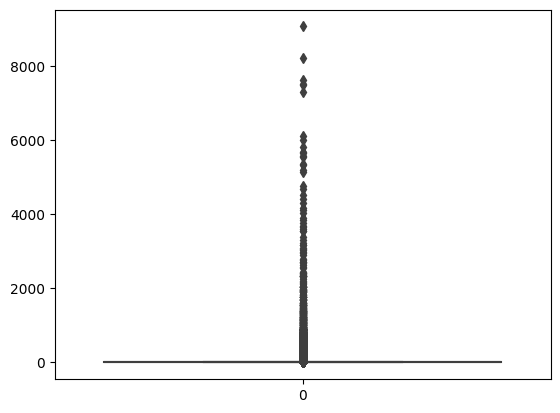

In [386]:
sns.boxplot(df1['VRDeck'])

In [387]:
df1.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

# Splitting the dataset

In [388]:
y =df1['Transported']
X = df1.drop(columns='Transported')

print(y.shape,X.shape)

(6367,) (6367, 10)


In [389]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=27)
#y_train =pd.DataFrame(y_train)
#y_test =pd.DataFrame(y_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5093, 10) (1274, 10) (5093,) (1274,)


# Scaling

In [390]:
scaler1 = MinMaxScaler()
#scaler2 = StandardScaler()

X_train_sc = scaler1.fit_transform(X_train)
X_test_sc = scaler1.fit_transform(X_test)

In [391]:
X_train_sc =pd.DataFrame(X_train_sc,columns = X_train.columns)
X_test_sc =pd.DataFrame(X_test_sc,columns = X_test.columns)


# Modelling

In [392]:
def evaluate_classifiers(X_train_sc,X_test_sc,y_train,y_test):
    
    models = {
      "Logistic Regression": LogisticRegression(max_iter=1000),
      "Support Vector Classifier": SVC(),
      "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
      "Decision Tree": DecisionTreeClassifier(),
      "Random Forest": RandomForestClassifier(n_estimators=100), 
      "MLPClassifier": MLPClassifier(),
      "RandomForestClassifier": RandomForestClassifier(), 
      "GradientBoostingClassifier": GradientBoostingClassifier()
      }
  
    results = []
    for name,model in models.items():
        model.fit(X_train_sc,y_train)
        y_pred = model.predict(X_test_sc)
        accuracy = accuracy_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)    
        results.append({'name':name,'model':model,'accuracy':accuracy,'precision':precision})
    
    
    df_results = pd.DataFrame(results).sort_values(by=['accuracy'],ascending=False, ignore_index= True)
    return df_results
  
df_scores = evaluate_classifiers(X_train_sc, X_test_sc, y_train, y_test)
print(df_scores)



                         name  \
0  GradientBoostingClassifier   
1               MLPClassifier   
2   Support Vector Classifier   
3               Random Forest   
4         Logistic Regression   
5      RandomForestClassifier   
6         K-Nearest Neighbors   
7               Decision Tree   

                                               model  accuracy  precision  
0  ([DecisionTreeRegressor(criterion='friedman_ms...  0.815542   0.804878  
1                                    MLPClassifier()  0.813972   0.799465  
2                                              SVC()  0.788854   0.827044  
3  (DecisionTreeClassifier(max_features='sqrt', r...  0.787284   0.802632  
4                  LogisticRegression(max_iter=1000)  0.785714   0.809309  
5  (DecisionTreeClassifier(max_features='sqrt', r...  0.784929   0.802651  
6                             KNeighborsClassifier()  0.772370   0.782546  
7                           DecisionTreeClassifier()  0.750392   0.759547  


In [393]:
print("The best model is "+str(df_scores.iloc[0,0])+ " with the Accuracy score of "+str(df_scores.iloc[0,2]))

The best model is GradientBoostingClassifier with the Accuracy score of 0.8155416012558869


# Cross Validation

In [394]:
selected_model = df_scores.iloc[0,1]
selected_model

GradientBoostingClassifier()

In [395]:
sc=[]
for i in range(2,10):
 cv_score = cross_val_score(selected_model,X_train_sc,y_train,cv=i)
 sc.append({'cv':i,'score':cv_score.mean()})

cv_score_df = pd.DataFrame(sc).sort_values(by='score',ascending=False, ignore_index= True)
print(cv_score_df)
print("\nThe cv with the best score is "+str(cv_score_df.iloc[0,0]))

   cv     score
0   2  0.800904
1   5  0.800903
2   8  0.800315
3   4  0.799726
4   7  0.799532
5   3  0.798745
6   9  0.798353
7   6  0.797570

The cv with the best score is 2


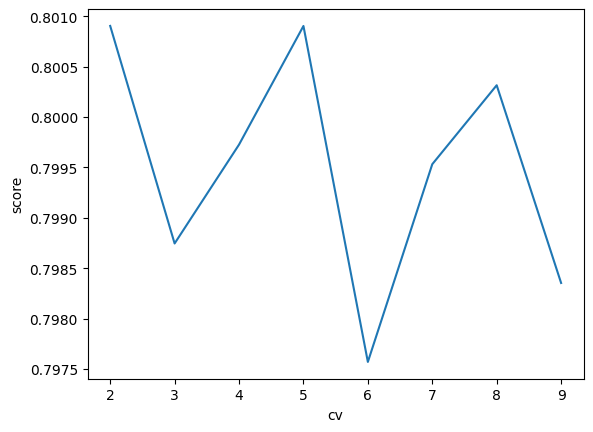

In [396]:
sns.lineplot(x=cv_score_df['cv'],y=cv_score_df['score'])
plt.show()

# Hyperparameter Tuning

In [397]:
selected_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [401]:
param_grid = {
 'ccp_alpha': [0.0001,0.001,0.01,1],
  'min_samples_leaf': [1,2,3,4,5],
 'min_samples_split': [2,4,6,8]

 }



gridcv_model = GridSearchCV(estimator=selected_model, param_grid=param_grid, cv= cv_score_df.iloc[0,0],scoring='accuracy')
gridcv_model.fit(X_train_sc, y_train)
     
print(gridcv_model .best_params_)
print(gridcv_model .best_score_)  

{'ccp_alpha': 0.0001, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.8007075773571545


In [402]:
fin_mod = gridcv_model.best_estimator_
fin_mod_y_pred = fin_mod.predict(X_test_sc)
fin_mod_score = accuracy_score(y_test, fin_mod_y_pred)
fin_mod_score

0.8084772370486656

In [403]:

import joblib
joblib.dump(fin_mod, "spaceship-titanic_1.0.pkl")

['spaceship-titanic_1.0.pkl']